
1.Check Distripution
2.correlation
3.Handling imbelance data
4.Feature Importance
5.Resample
6.Model Train and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_5152\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

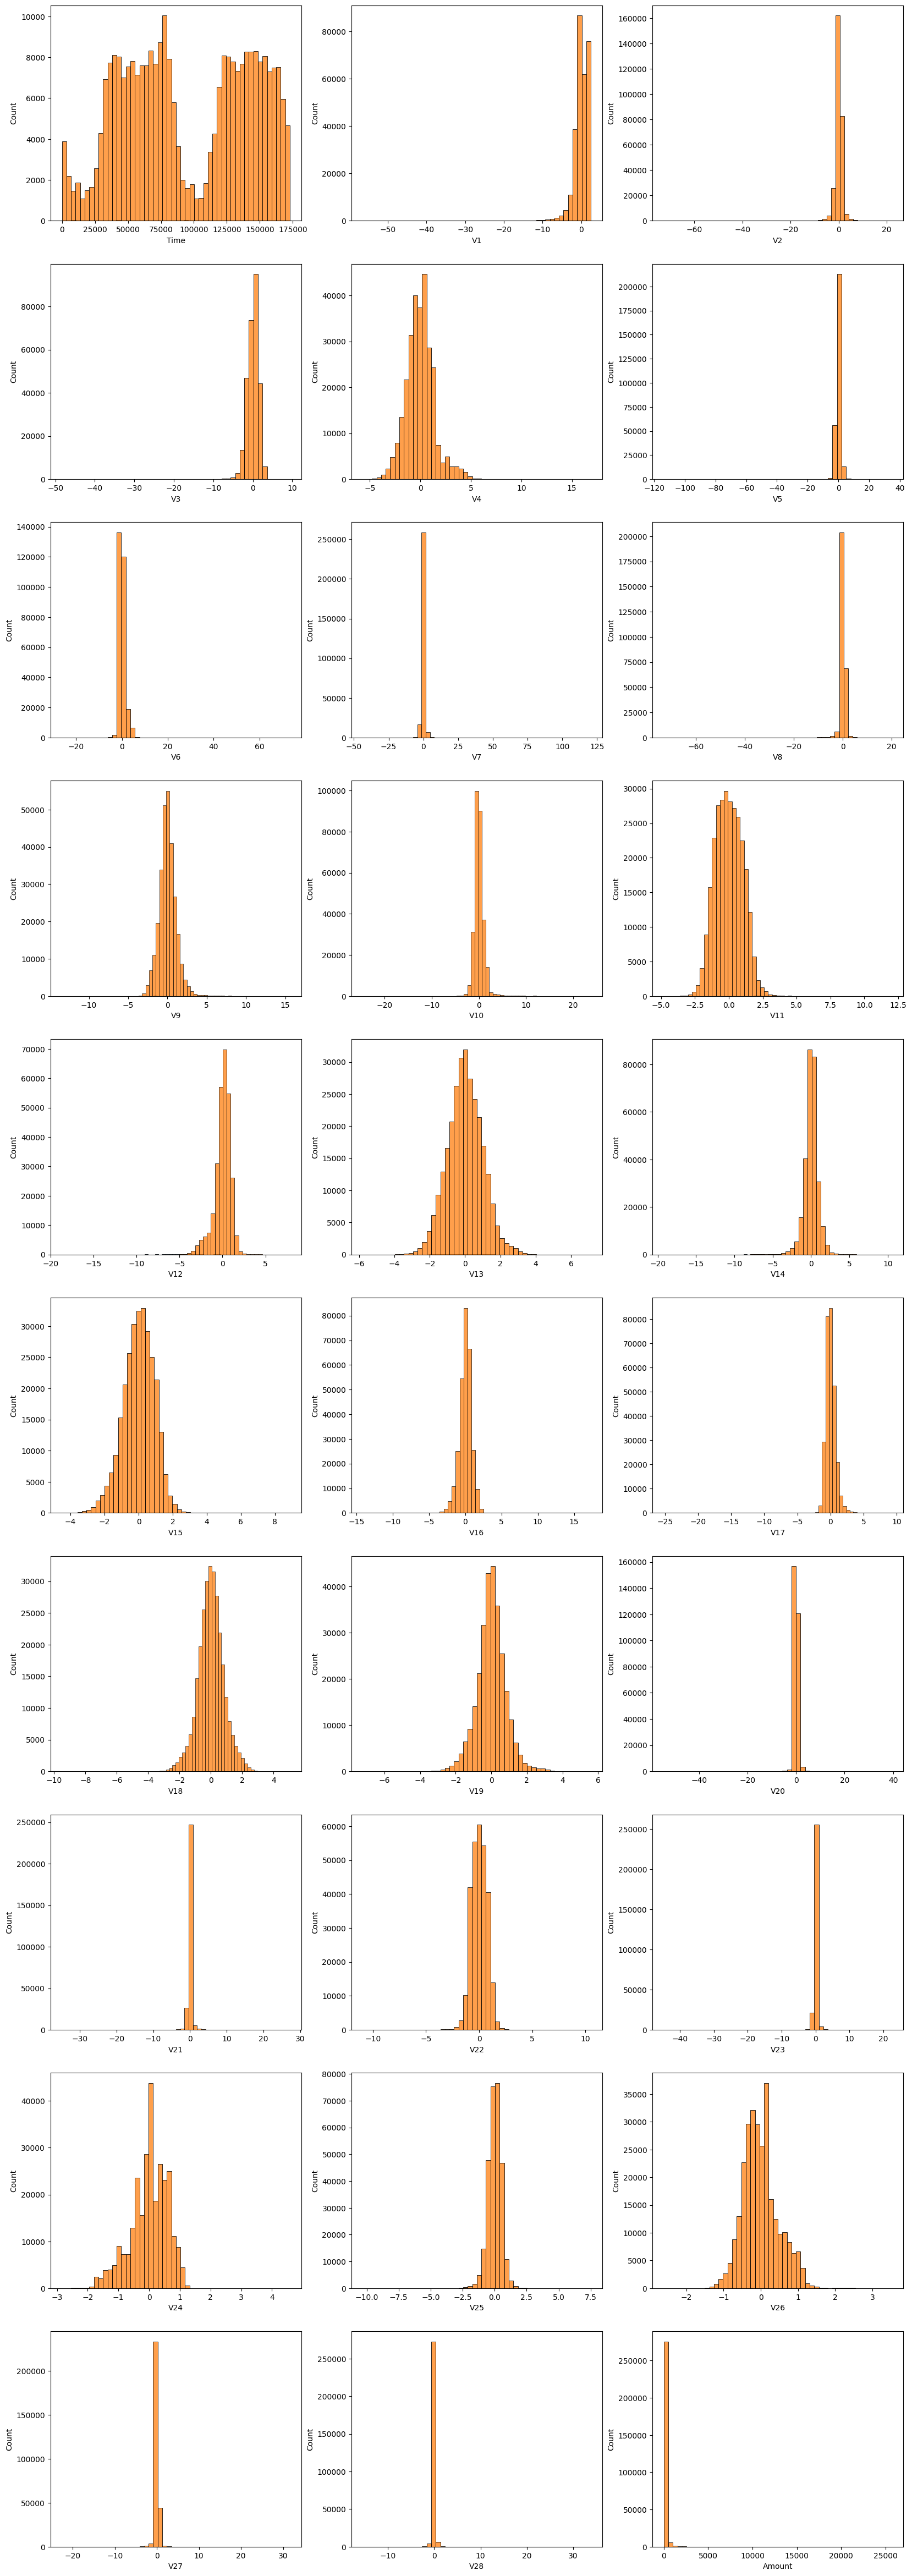

In [7]:
notfraud = data.Class == 0
fraud = data.Class == 1
plt.figure(figsize = (20,60))
for n,col in enumerate(data.drop('Class',axis =1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(data[col][data.Class == 1],bins = 50)
    sns.histplot(data[col][data.Class == 0],bins = 50)
plt.show()

In [8]:

data[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

<Axes: >

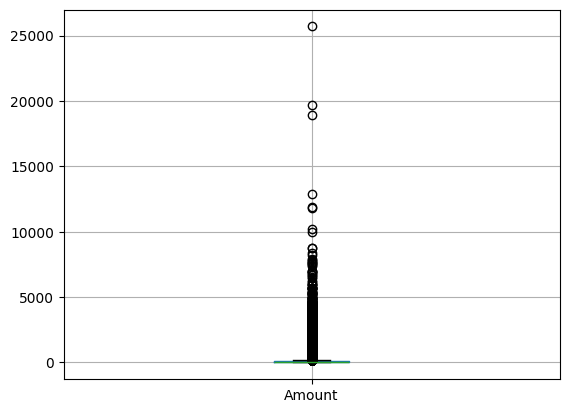

In [9]:
data.boxplot('Amount')


<Axes: xlabel='Amount', ylabel='Time'>

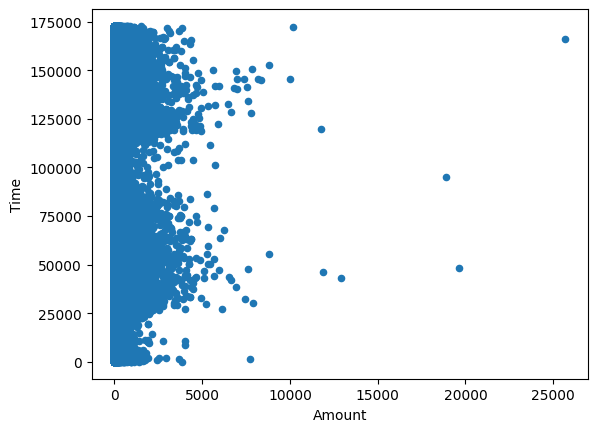

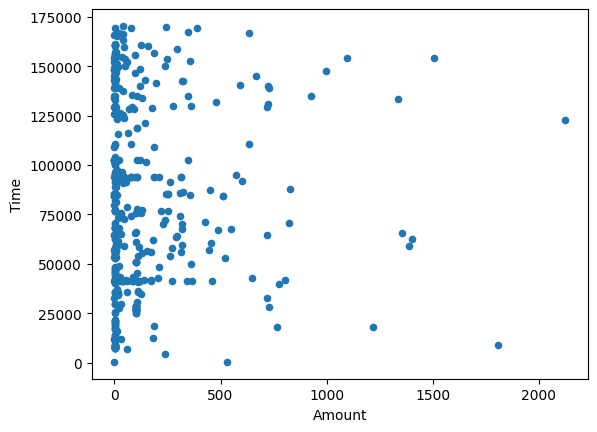

In [10]:
data[data.Class == 0].plot.scatter('Amount','Time')
data[data.Class == 1].plot.scatter('Amount','Time')

In [11]:
data[data.Amount > 10000].shape

(7, 31)

In [12]:
data = data.drop(data[data.Amount > 10000].index,axis = 0)


correlation

In [13]:
corr = data.corr()

In [14]:
corr['Class']

Time     -0.012323
V1       -0.101611
V2        0.092067
V3       -0.193567
V4        0.133586
V5       -0.096417
V6       -0.043896
V7       -0.191306
V8        0.019890
V9       -0.097741
V10      -0.217033
V11       0.154891
V12      -0.260648
V13      -0.004568
V14      -0.302612
V15      -0.004221
V16      -0.196682
V17      -0.326526
V18      -0.111502
V19       0.034796
V20       0.020590
V21       0.040536
V22       0.000800
V23      -0.002711
V24      -0.007220
V25       0.003306
V26       0.004456
V27       0.017790
V28       0.009577
Amount    0.006033
Class     1.000000
Name: Class, dtype: float64

check imbelance data

In [15]:
count = data.Class.value_counts()
print(count)

Class
0    284308
1       492
Name: count, dtype: int64


In [16]:

count[0]/sum(count)*100

99.82724719101124

In [17]:
count[1]/sum(count)*100

0.17275280898876405

In [18]:
x = data.drop('Class',axis =1)
y = data.Class.values

Feature importance

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter = 200,random_state =12,solver = 'liblinear')
model.fit(x,y)

LogisticRegression(max_iter=200, random_state=12, solver='liblinear')

In [21]:
coff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(model.coef_))],axis =1)

In [22]:
coff

,0,0
0,Time,-0.000071
1,V1,0.318721
2,V2,-0.483858
3,V3,-0.793137
4,V4,0.120292
5,V5,0.057527
6,V6,-0.054040
7,V7,0.335278
8,V8,-0.374233
9,V9,-0.388334


In [23]:
coff.columns = ['feature','imptancecoff']
coff.sort_values(by='imptancecoff',inplace = True)

In [24]:
coff

,feature,imptancecoff
3,V3,-0.793137
14,V14,-0.694218
2,V2,-0.483858
17,V17,-0.439679
15,V15,-0.427660
9,V9,-0.388334
8,V8,-0.374233
25,V25,-0.356115
13,V13,-0.306448
16,V16,-0.294582


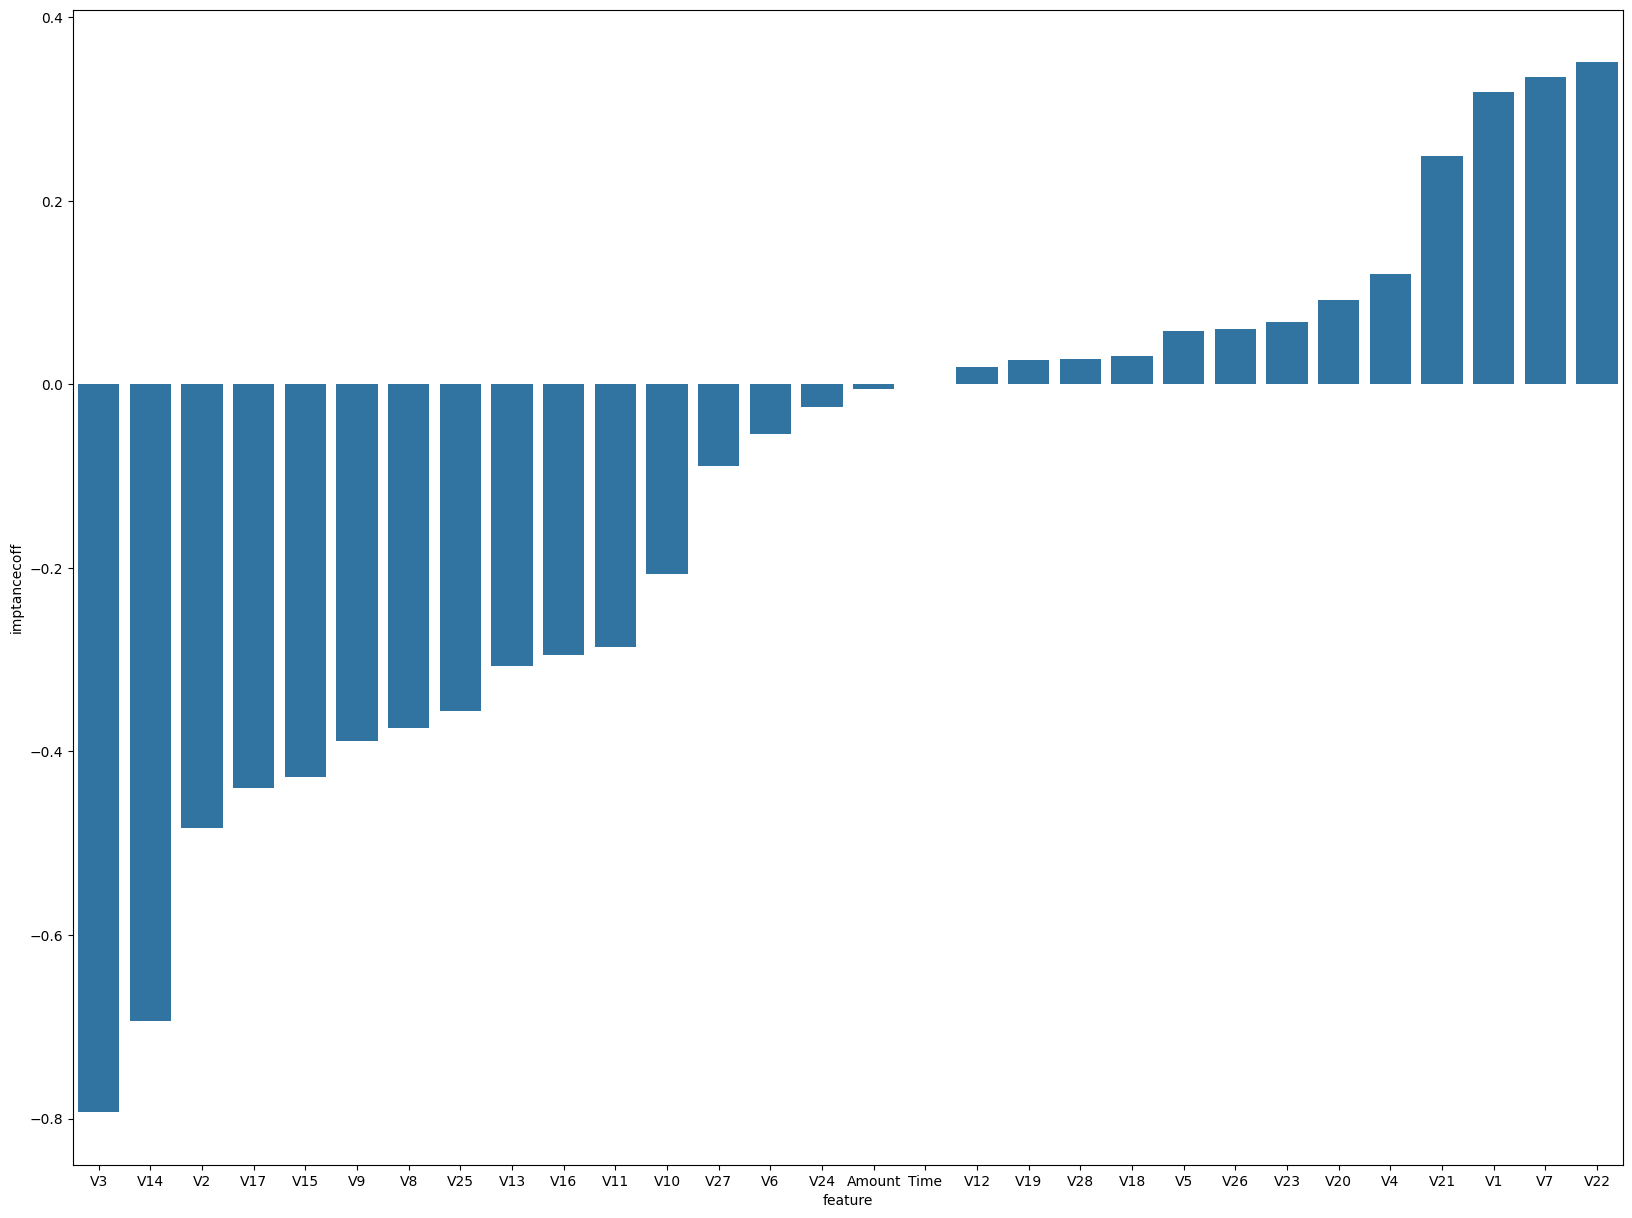

In [25]:
plt.figure(figsize=(20,15))
sns.barplot(x ='feature',y='imptancecoff',data =coff)
plt.show()

Resampling

In [26]:
notfraud  =data[data.Class == 0]
fraud = data[data.Class ==1]

no_of_sample = round(notfraud.shape[0] *0.05)

In [27]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [28]:
nofraud2 =  resample(notfraud,n_samples =no_of_sample,random_state = 15 )

In [29]:
data_sample = pd.concat([nofraud2,fraud],axis= 0)

In [30]:
x_sample = data_sample.drop('Class',axis =1)
y_sample = data_sample.Class

In [31]:
res =RandomOverSampler()
x,y = res.fit_resample(x_sample,y_sample)
y.value_counts()

Class
0    14215
1    14215
Name: count, dtype: int64

Model build

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.20)

In [39]:
lr_model = LogisticRegression()

In [40]:
lr_model.fit(xtrain,ytrain)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr_model.score(xtrain,ytrain)

0.9420066830812522

In [42]:
lr_model.score(xtest,ytest)

0.9421385860007034